In [1]:
import numpy as np
import healpy as hp
import astropy.units as u
from emission_data_processing import loadPlanckData


In [2]:
plank = loadPlanckData()
np.shape(plank)
# 5 rows correspond to 5 frequencies at 217, 353, 545, 857GHz from the Planck satellite and the 2998GHz IRAS/DIRBE map, after subtracting the contribution
# of the CMB.
# Nside = 1024 corresponds to 12582912 pixels on the sphere

Reading map data...
Subtracting CMB from Planck w approp. conversions from Kcmb to MJySr-1...
Converting from Kcmb to MJySr-1...


(5, 12582912)

In [3]:
print(np.min(plank[4]), np.max(plank[4]))

0.018291428685188293 21552.49609375


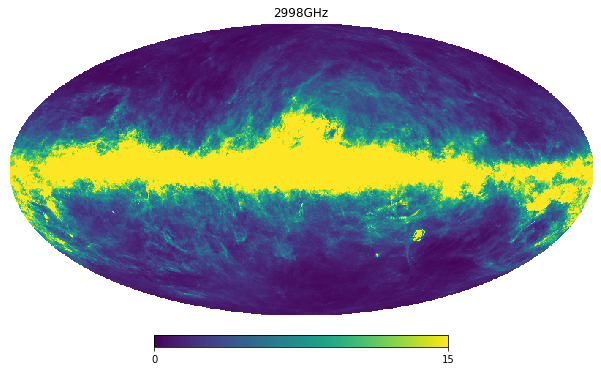

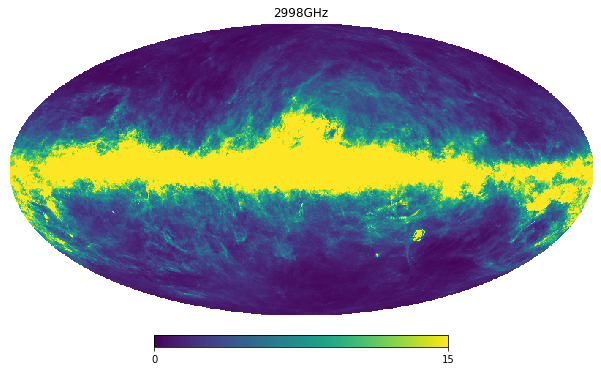

In [4]:
hp.mollview(plank[4], title='2998GHz',nest=True, min = 0, max = 15)
ring = hp.reorder(plank[4],n2r=True)
hp.mollview(ring, title='2998GHz',min = 0, max = 15)
#Note: there are values higher than 15 and they will all display this highest color
#Note: The unit of the map is MJy/sr (MegaJansky per steradian). A jansky is a unit of monochromatic flux 1Jy = 10^-26 W/m^2/Hz


In [11]:
# Create custom rotator, sets input longitude and latitude as new center
longitude = 10 * u.deg
latitude = 10 * u.deg
rot_custom = hp.Rotator(rot=[longitude.to_value(u.deg), latitude.to_value(u.deg)], inv = True)  # Apparently, more accurate to use opposite to centre and invert
rot_custom_back = hp.Rotator(rot=[longitude.to_value(u.deg), latitude.to_value(u.deg)]) 
rot_back = hp.Rotator(rot=[-longitude.to_value(u.deg), -latitude.to_value(u.deg)], inv = True)

(array([10., 10.]),
 array([-10.15108171,  -9.84655194]),
 array([-0.1534145 ,  0.14885616]))

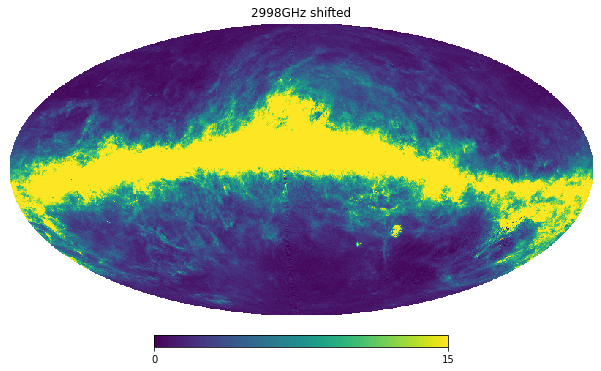

In [23]:
slight_shift = rot_custom.rotate_map_alms(ring)
hp.mollview(slight_shift, title='2998GHz shifted', min = 0, max = 15) 

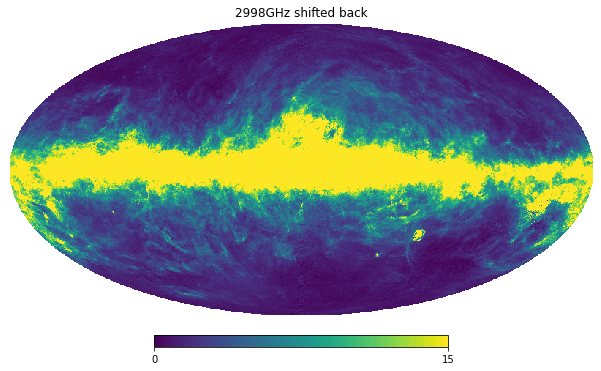

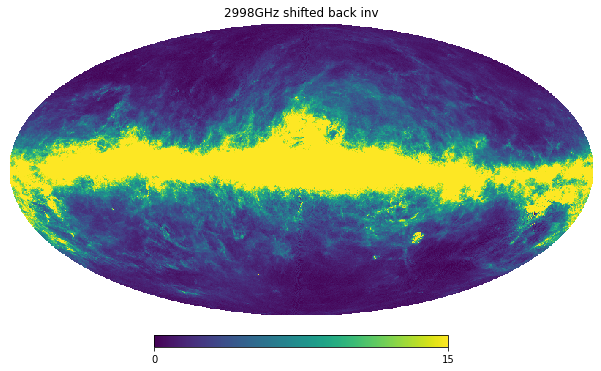

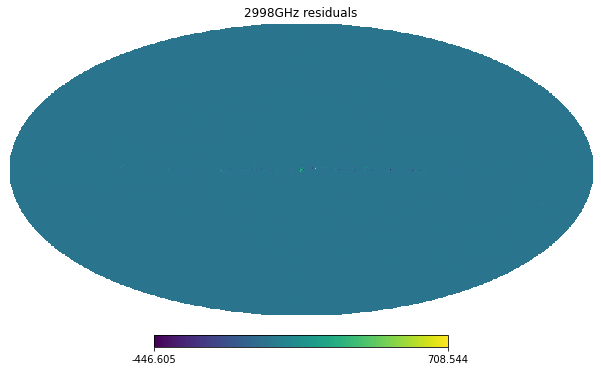

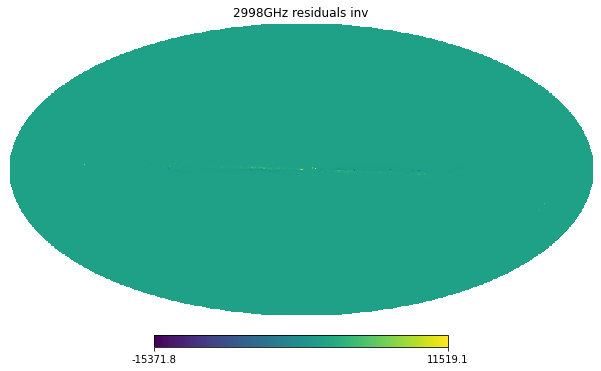

In [25]:
return_custom = rot_custom_back.rotate_map_alms(slight_shift)

return_back = rot_back.rotate_map_alms(slight_shift)

#hp.mollview(return_custom, title='2998GHz shifted back', min = 0, max = 15)
#hp.mollview(return_back, title='2998GHz shifted back inv', min = 0, max = 15)

#Residuals
residual_custom = return_custom - ring
residual_back = return_back - ring
hp.mollview(residual_custom, title='2998GHz residuals')
hp.mollview(residual_back, title='2998GHz residuals inv')


-69.02915440469856 22520.040955998167
-85.2514269399881 22377.775337708958


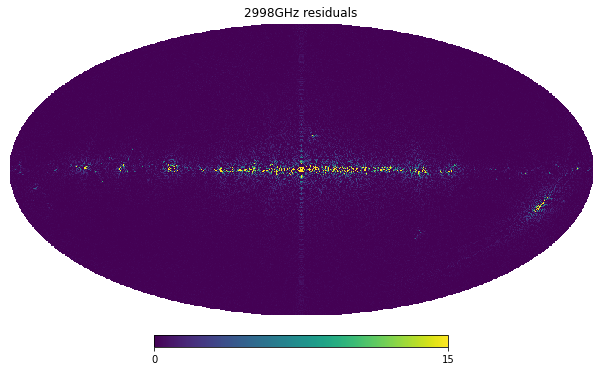

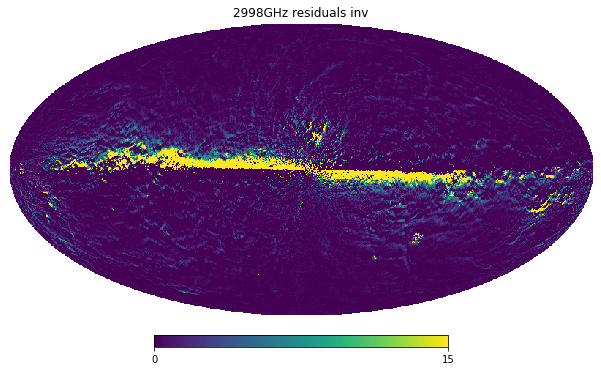

In [38]:
print(np.min(return_custom),np.max(return_custom))
print(np.min(return_back), np.max(return_back))
hp.mollview(residual_custom, title='2998GHz residuals', min = 0, max = 15)
hp.mollview(residual_back, title='2998GHz residuals inv', min = 0, max = 15)
# doing the rotateback with inv is worse

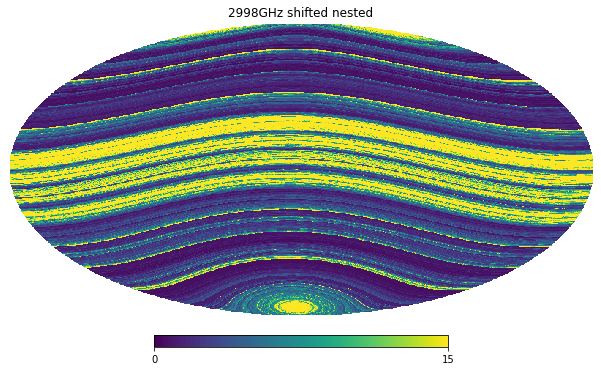

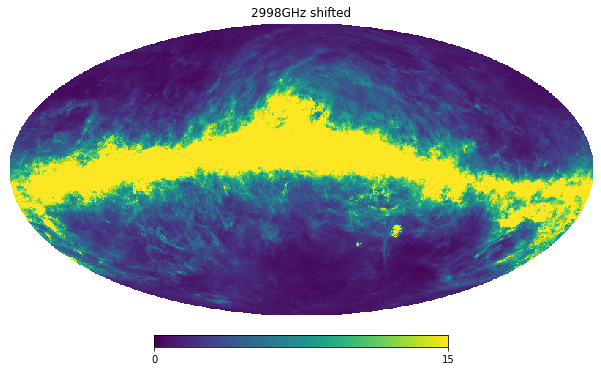

In [39]:
slight_shift_pixelo = rot_custom.rotate_map_pixel(plank[4])
slight_shift_pixel = rot_custom.rotate_map_pixel(ring)
hp.mollview(slight_shift_pixelo, title='2998GHz shifted nested', min = 0, max = 15) 
hp.mollview(slight_shift_pixel, title='2998GHz shifted', min = 0, max = 15) 

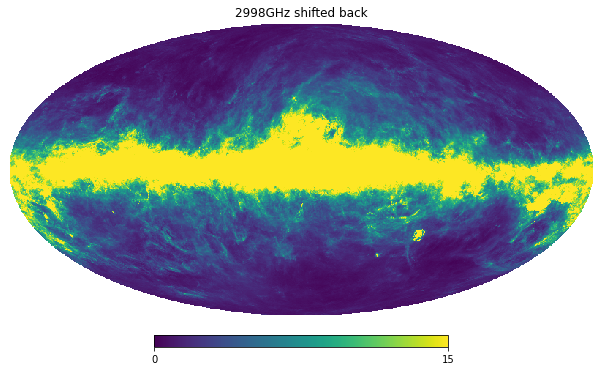

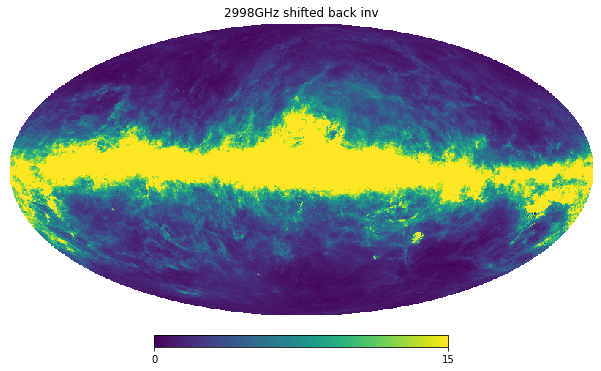

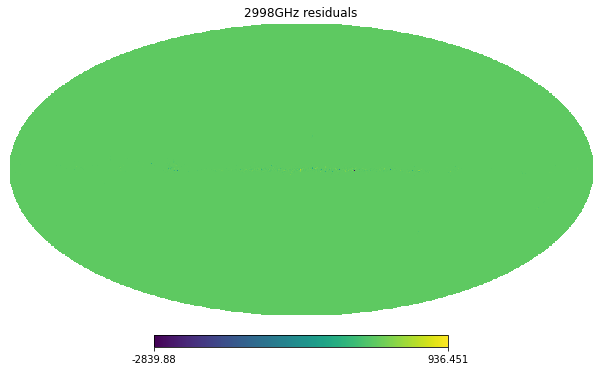

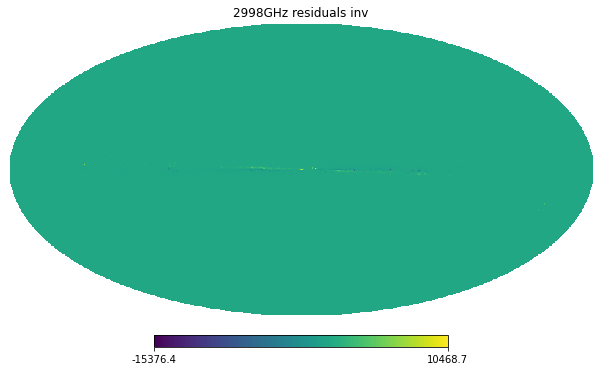

In [40]:
return_custom = rot_custom_back.rotate_map_pixel(slight_shift_pixel)

return_back = rot_back.rotate_map_alms(slight_shift_pixel)

hp.mollview(return_custom, title='2998GHz shifted back', min = 0, max = 15)
hp.mollview(return_back, title='2998GHz shifted back inv', min = 0, max = 15)

#Residuals
residual_custom = return_custom - ring
residual_back = return_back - ring
hp.mollview(residual_custom, title='2998GHz residuals')
hp.mollview(residual_back, title='2998GHz residuals inv')


0.02837815062342186 19016.449754561072
-150.2677580198393 21041.660666171625


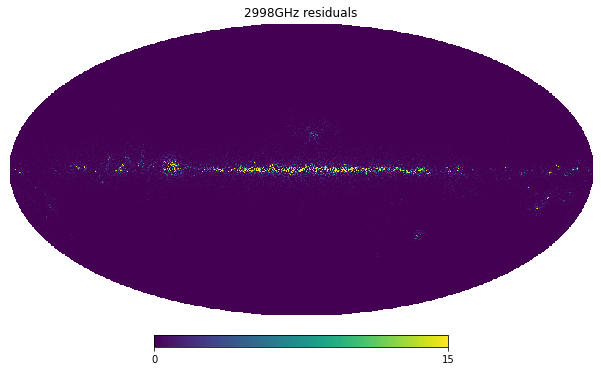

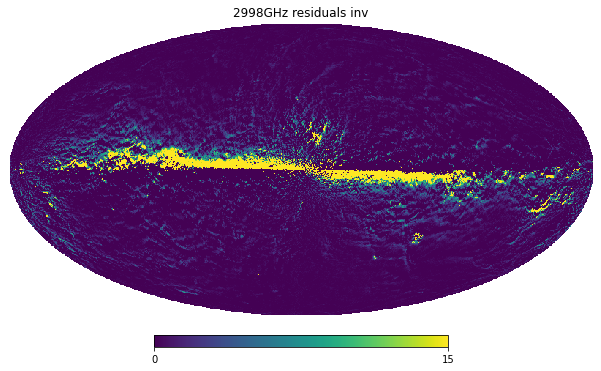

In [41]:
print(np.min(return_custom),np.max(return_custom))
print(np.min(return_back), np.max(return_back))
hp.mollview(residual_custom, title='2998GHz residuals', min = 0, max = 15)
hp.mollview(residual_back, title='2998GHz residuals inv', min = 0, max = 15)
# doing the rotateback with inv is worse

NameError: name 'hi' is not defined